In [1]:
library(Spectra)

Loading required package: S4Vectors



Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following object is masked from 'package:utils':

    findMatches


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: BiocParallel

Loading required package: ProtGenerics


Attaching package: 'ProtGenerics'


The following object is masked from 'pa

In [2]:
# get mzML files directory
mzml_files <- list.files(path = "C:/Users/fanya174/Documents/Aging/raw_pos", pattern = "\\.mzML$", full.names = TRUE)

# Read volcano data
# indicate the sample has the max intensity

In [5]:
Features <- read.csv("important_features.csv", header = TRUE, check.names = FALSE, sep = ",")
# sort SigFeatures by Sample_max
Features <- Features[order(Features$sample_max),]
head(Features)

,sample,QC_38_01_13658,WT-week8-4_5_01_13659,KO-week8-5_12_01_13660,KO-week8-3_10_01_13661,WT-week52-6_31_01_13662,KO-week16-1_20_01_13663,KO-week16-2_21_01_13664,WT-week16-2_15_01_13665,WT-week52-5_30_01_13666,⋯,KO-week16-5_24_01_13693,QC_38_01_13694,KO-week52-4_35_01_13695,KO-week8-4_11_01_13696,KO-week16-4_23_01_13697,WT-week52-3_28_01_13698,QC_38_01_13699,sample_max,mzmed,rtmed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
120,M232T388,547998.9,136379.43,304794.0,385822.9,36507.386,637063.8,383948.82,404911.0,39568.737,⋯,86616.62,541827.7,17103.863,212246.6,398101.0,35154.778,505921.21,KO-week16-1_20_01_13663,232.1245,387.5795
261,M195T626,198778.2,241585.90,279283.9,186037.8,227475.204,371407.7,317536.11,284774.3,259823.513,⋯,276861.19,195409.7,244674.796,229771.2,308135.4,144271.646,163112.63,KO-week16-1_20_01_13663,195.1183,625.5230
267,M275T635,137083.6,55172.04,105705.0,171025.5,6923.152,224269.3,170668.06,149705.4,8942.849,⋯,48563.39,100309.4,9261.748,109448.8,140209.6,2806.152,65455.93,KO-week16-1_20_01_13663,275.1744,634.7815
268,M274T635,851381.3,430062.95,652061.9,1084406.6,24975.967,1519059.0,1125411.44,1033123.6,33232.484,⋯,398340.50,626875.1,32253.770,508189.4,949726.3,62153.016,489276.25,KO-week16-1_20_01_13663,274.1713,635.2230
271,M242T649,555488.0,122010.48,416429.1,517829.7,17828.569,1257927.3,1034365.10,827836.9,27134.550,⋯,143121.19,519463.6,18866.108,432306.8,816220.0,33566.184,508097.16,KO-week16-1_20_01_13663,242.1703,649.3385
278,M274T655_2,633438.2,233399.29,383404.9,471940.9,39686.117,932896.7,44251.93,674389.6,46709.959,⋯,285026.97,535538.9,42100.872,337625.9,484911.2,55509.769,429639.03,KO-week16-1_20_01_13663,274.1704,655.2645


In [6]:
# function to normalize the intensity of the spectra
low_int <- function(x,...){
    x > max(x, na.rm = TRUE) * 0.05
}
norm_int<-function(x,...){
    maxint <- max(x[,"intensity"], na.rm=TRUE)
    x[,"intensity"] <- 100 * x[,"intensity"]/maxint
    x
}

## Get spectrum of volcano features

In [7]:
ms2list2 <- list()
for (row in 1:nrow(Features)){
    feature <- Features[row, "sample"]
    mz <- Features[row, "mzmed"]
    rt <- Features[row, "rtmed"]
    sample <- Features[row, "sample_max"]
    sample_file <- paste0(sample, ".mzML")
    print(feature)
    for (fl in mzml_files){
        if (sample_file == basename(fl)){
            sample_sps <- Spectra(fl)
            sample_sps <- filterMsLevel(sample_sps, msLevel = 2L)
            sample_sps <- filterRt(sample_sps,rt=c((rt-10), (rt+10)))
            sample_sps <- filterPrecursorMzRange(sample_sps, mz=c((mz-0.01), (mz+0.01)))
            sample_sps <- addProcessing(sample_sps, norm_int)
            sample_sps <- filterIntensity(sample_sps, intensity = low_int)
            # combine Spectra ???
            sample_sps <- combineSpectra(sample_sps, FUN = combinePeaks, ppm =10,
                                            peaks = "intersect", minProp = 0.8,
                                            intensityFun = median, mzFun = median)


            if (length(sample_sps) > 0){
                sample_sps$Feature_ID <- feature
                ms2list2<-c(ms2list2, sample_sps)
            }
        }
    }                
}

[1] "M232T388"


Warning message in fun(libname, pkgname):
"mzR has been built against a different Rcpp version (1.0.10)
than is installed on your system (1.0.11). This might lead to errors
when loading mzR. If you encounter such issues, please send a report,
including the output of sessionInfo() to the Bioc support forum at 
https://support.bioconductor.org/. For details see also
https://github.com/sneumann/mzR/wiki/mzR-Rcpp-compiler-linker-issue."
Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M195T626"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M275T635"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M274T635"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M242T649"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M274T655_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M265T722"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M109T758"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M209T758"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M199T792"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M277T804"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M289T818"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M195T819"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M233T838"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M241T838"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M261T845"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M365T849"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M255T859"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M307T860"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M253T863"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M191T864"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M267T866"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M209T871"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M312T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M130T873"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M330T873"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M352T873"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M277T875_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M212T880"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M348T884"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M349T884"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M349T885"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M438T887"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M325T887"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M299T906"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M333T911"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M123T913"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M304T918"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M307T921"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M302T923"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M351T930"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M331T932"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M171T934"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M294T949"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M305T950"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M313T950"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M287T950"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M291T952"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M237T952"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M288T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M351T958_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M295T963"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M296T964"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M337T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M430T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M109T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M312T967"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M312T977"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M370T981_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M370T981_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M311T981"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M328T981"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M333T982"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M312T982"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M581T989_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M179T989"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M594T1041"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M689T1066"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M688T1067"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M700T1073"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M660T1074"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M694T1077"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M829T1082"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M238T362"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M148T598"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M213T690"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M240T759"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M566T836"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M223T859"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M294T862"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M679T878"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M303T887"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M302T905"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M314T926"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M309T935"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M648T961"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M311T964"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M155T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M288T974"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M269T980"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M291T981"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M367T982"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M403T983"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M595T1041"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M652T1048"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M653T1048"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M622T1049"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M623T1049"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M638T1051"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M637T1052"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M636T1052"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M666T1052"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M667T1052"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M695T1076"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M174T364"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M372T381"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M169T417"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M310T441"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M266T464"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M333T477"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M303T489"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M310T491"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M153T506"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M216T514"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M216T535"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M146T542"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M273T548"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M313T551"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M301T559"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M414T582"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M398T584"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M250T591"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M202T633"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M232T634"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M273T634"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M429T651"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M246T651"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M216T651"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M413T655"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M412T655"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M244T661"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M171T674"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M193T675"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M259T677"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M220T677"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M372T682"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M447T688"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M276T696"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M308T698"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M386T711"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M244T711"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M375T720"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M376T720"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M213T731"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M204T734_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M258T756"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M295T757"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M349T776"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M139T778"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M458T778"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M457T778"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M153T790"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M292T797"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M570T799"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M571T799"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M372T800"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M117T802"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M590T808"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M334T812"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M297T813"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M305T813"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M280T813_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M593T816"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M572T816"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M571T817"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M573T817"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M251T821"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M177T823"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M564T824"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M195T837"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M375T838"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M253T844"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M457T845"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M440T851"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M205T853"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M450T855"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M612T864"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M550T868"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M548T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M552T872_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M416T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M553T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M305T873_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M268T874"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M344T888"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M366T891"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M296T892"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M552T896"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M296T900"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M573T905"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M268T905"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M313T906"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M304T906"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M305T907"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M296T907_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M580T907"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M288T907"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M570T908"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M554T908"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M575T908"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M574T908"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M306T908"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M508T920"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M287T920"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M287T921"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M305T921"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M573T922"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M295T922"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M572T922"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M551T922"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M550T922"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M304T922"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M359T928"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M548T929"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M269T929"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M331T936"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M392T944"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M299T946_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M296T950_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M297T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M667T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M510T960"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M403T960_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M397T966_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M558T973"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M887T977"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M865T978"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M863T980"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M251T983"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M510T983"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M538T998_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M793T1002"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M845T1019"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M843T1022"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M653T1036"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M624T1036"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M596T1038"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M597T1038"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M622T1038_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M789T1076_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M790T1077"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M823T1078"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M831T1082"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M815T1083_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M221T292"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M383T327"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M319T401"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M237T434"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M333T453"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M354T467"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M285T546"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M166T549"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M452T580"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M400T594"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M347T601"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M412T633"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M468T671"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M350T672"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M424T675"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M375T693"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M376T693"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M347T698"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M440T745"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M197T750"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M265T751"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M450T757"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M251T775"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M193T790"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M193T792"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M592T816"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M221T840"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M209T849"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M233T854"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M256T864"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M353T865"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M225T871"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M305T873_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M333T896_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M593T899"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M233T900"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M296T907_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M553T908_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M552T908"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M276T920"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M511T932"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M512T945"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M511T947"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M534T949"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M268T949_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M535T949"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M279T951"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M309T959"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M372T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M297T976_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M556T980"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M342T981"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M748T1029_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M652T1037"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M666T1037"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M612T1038"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M622T1038_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M610T1038"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M611T1038"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M639T1062"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M236T515"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M281T951"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M792T1003"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M791T1085"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M701T107_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M227T865"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M283T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M229T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M228T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M282T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M250T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M593T873"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M268T875"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M315T820"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M315T842"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M363T849"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M275T850"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M633T911"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M345T946"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M225T949"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M170T232"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M191T233"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M169T233"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M153T308"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M202T566"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M220T717"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M248T811"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M422T940"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M448T955_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M449T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M527T1025"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M527T1029_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M329T1072"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M457T104"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M614T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M384T858"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M272T875_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M616T883"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M618T883"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M615T883"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M676T883_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M614T883"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M617T883_3"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M386T884"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M928T892"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M255T896"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M583T899"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M478T935"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M221T940"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M357T944"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M288T944"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M243T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M314T977"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M247T985"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M379T986"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M378T994_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M476T1018"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M478T1029_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M635T100"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M186T504"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M304T523"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M304T527"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M266T535"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M276T874"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M300T878"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M301T879"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M302T879"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M283T879"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M318T892"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M290T893"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M268T893"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M302T901"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M285T902"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M304T902"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M303T902"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M242T919"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M344T930"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M330T932"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M231T946"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M209T946"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M211T950"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M233T950"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M225T986_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M225T986_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M580T100_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M577T100"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M578T101_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M557T102"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M559T102"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M83T111"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M695T113"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M136T413"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M209T413"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M210T413"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M192T413"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M120T413"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M455T873"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M260T874"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M479T102_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M480T102_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M130T170"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M361T233"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M240T350"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M184T394"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M258T506"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M362T767"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M347T831"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M273T875"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M369T892_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M275T908"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M316T925"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M447T941"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M446T942"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M412T957"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M450T962"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M320T1004"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M383T1124"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M245T91"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M534T99"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M517T101_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M466T101_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M337T102"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M585T102"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M400T103_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M590T104_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M589T104"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M586T105_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M768T105"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M579T106_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M761T107"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M630T109_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M707T112_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M293T284"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M315T323"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M282T325"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M245T340"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M113T340"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M246T418"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M302T421"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M246T421"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M315T461"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M368T503"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M167T651"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M225T671"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M123T677"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M197T797"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M167T799_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M253T816"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M193T848"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M445T851"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M317T858"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M183T859"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M342T868"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M415T872"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M325T873"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M137T879"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M739T882_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M207T889"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M391T893"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M291T904"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M233T916"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M377T922"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M253T938"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M368T943"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M317T961_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M275T988"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M580T1040"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M608T1047"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M346T1138"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M599T100_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M563T100_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M432T102_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M667T103_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M467T103"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M571T105"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M560T105"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M579T106_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M780T106_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M650T110"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M228T244"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M138T250"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M384T511"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M199T610"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M447T666"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M167T671"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M195T688"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M270T730"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M230T730"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M257T738_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M207T777"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M316T844"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M456T846"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M446T851"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M351T857"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M385T866"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M371T866"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M585T867"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M274T871"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M552T872_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M307T874"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M314T883"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M313T883"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M442T911_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M443T911"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M399T912"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M359T916"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M367T927"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M373T928"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M362T928"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M333T930"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M367T937"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M362T939"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M351T942"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M335T954"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M277T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M171T957"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M357T960"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M312T961"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M371T963"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M330T964"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M309T964"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M293T964_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M336T965_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M331T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M444T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M352T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M452T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M335T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M648T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M277T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M195T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M177T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M149T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M213T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M227T967"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M649T967"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M211T967"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M559T972"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M277T987"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M638T1045"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M520T1051"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M404T102"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M608T103_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M353T104"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M909T106"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M558T106_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M684T114"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M226T232"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M346T309"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M400T388"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M539T388"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M369T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M538T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M119T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M138T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M271T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M540T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M269T389_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M137T389_6"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M537T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M385T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M270T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M110T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M137T390"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M137T478"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M394T524"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M306T544"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M138T551"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M188T573"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M206T574"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M220T574"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M170T598"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M270T733"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M263T733"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M153T737"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M228T758"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M227T758_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M251T760"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M283T764"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M265T784"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M263T836"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M221T853"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M351T853"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M241T854_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M263T854"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M199T855"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M221T855"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M277T856"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M246T857"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M213T864"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M266T865"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M226T865"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M244T865"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M245T865"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M272T866"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M347T866"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M348T866"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M370T867"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M369T867"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M387T867"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M289T874"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M325T875"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M554T875"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M207T875"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M237T877"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M684T879"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M149T880"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M213T880"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M739T882_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M426T882_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M277T884"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M354T884"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M681T884"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M295T884"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M684T885"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M177T885"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M375T890_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M325T891_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M291T893"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M592T901"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M349T903"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M327T904"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M331T915"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M331T920"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M401T929"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M349T930"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M399T930"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M277T932"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M295T933"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M335T933"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M330T934"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M331T934"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M343T934"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M369T935"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M275T938"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M377T940"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M377T943"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M331T944"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M331T958"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M328T959"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M349T960"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M650T962"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M333T963"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M369T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M275T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M647T965"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M730T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M681T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M334T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M196T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M646T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M679T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M643T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M663T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M645T966"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M351T967"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M644T967"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M301T975"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M383T979"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M384T980"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M155T981"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M293T981"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M391T982"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M628T984"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M585T984"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M315T990"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M279T993"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M277T993"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M539T998"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M280T1004"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M279T1004"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M179T1005"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M295T1007"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M296T1007"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M278T1007"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M277T1007"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M279T1022"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M675T1077"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M674T1077"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M676T1077"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M736T111"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M86T384"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M169T584"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M462T755"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M217T811"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M237T811"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M229T846"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M679T855"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M155T881"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M550T903"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M551T903"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M572T903"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M295T904"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M333T945"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M277T946"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M576T948"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M275T949"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M297T951"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M646T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M559T956"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M351T960"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M819T1123"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M482T107"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M690T107"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M691T108"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M651T109_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M629T109"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M739T110"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M132T137"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M229T159"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M280T476"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M279T476"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M202T779"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M225T846"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M179T852"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M368T859"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M618T862"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M214T863"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M219T871"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M263T885"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M510T934"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M584T963"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M319T981"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M207T1018"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M647T1054"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M245T420"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M359T461"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M179T781"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M267T782"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M202T832"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M335T983"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M233T426"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M216T708"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M203T816"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M202T816_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M275T871"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M290T880"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M230T880"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M288T882"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M244T893"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M301T946"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M648T1054"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M646T1054"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M232T383"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M291T880"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M173T402"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M127T416"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M149T612"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M171T613"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M215T618"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M169T682"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M111T683"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M230T765"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M213T776"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M231T879"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M227T802"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M317T582"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M229T765"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M207T765"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M929T875"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M209T95"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M165T110_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M265T111"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M124T228"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M123T228"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M202T453"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M100T494"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M116T550"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M97T550"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message in max(x[, "intensity"], na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M115T551"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M69T551"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M275T555"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M480T668_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M175T718"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M167T727"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M109T729"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M127T729"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M110T729"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M168T729"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M145T729"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M223T857"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M302T916"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M359T943"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M726T1079"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M202T448"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M158T513"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M258T635"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M245T857"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M177T857"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M191T861"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M308T927"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M577T953"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M598T954"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M718T1039"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M690T1047"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M632T1049"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M279T92_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M465T94"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M527T99"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M85T106"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M401T108"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M207T108"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M209T108"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M333T109"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M309T121"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M205T326"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M241T843"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M357T976"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M205T993"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M660T1058"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M348T96"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M415T96_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M347T97"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M211T178"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M175T293"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M237T337"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M291T372"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M238T380"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M237T380"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M203T384"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M221T384"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M175T385"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M259T391"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M258T392"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M272T414"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M273T414"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M202T428"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M306T486"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M272T502"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M272T517"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M176T600_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M224T600"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M246T600"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M422T627"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M258T768"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M181T828"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M436T849"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M594T849"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M391T852"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M246T854"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M299T866"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M429T869"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M596T869"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M386T876"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M195T880"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M582T886"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M189T899"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M576T925"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M577T928"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M165T931"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M357T934"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M375T936"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M579T939"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M319T940"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M538T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M518T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M289T955"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M288T956_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M519T956"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M560T964"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M167T964"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M561T969"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M479T975"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M376T975"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M381T977"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M622T1065"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M792T1085"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M817T1122"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M249T153"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M323T704"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M149T857"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M424T869"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M291T942"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M514T233"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M284T390"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M152T390"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M105T460"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M474T721"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M614T727"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M495T92_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M137T251"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M482T252"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M271T403"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M307T417"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M500T1017"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M501T1017"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M570T1029"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M568T1029_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M569T1029_4"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M571T1030_3"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M503T1032"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M502T1032"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M452T602"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M448T731"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M247T813"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M591T864"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M614T864"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M514T870"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M247T886"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M594T901"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M618T927"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M600T929"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M580T956"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M582T959"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M601T961"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M600T961"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M560T986"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M559T989"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M703T99"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M280T109"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M292T389"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M227T513"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M503T1035"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M146T126"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M158T180"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M314T227"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M160T512_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M409T512"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M144T512_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M410T512"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M189T512"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M146T512_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M170T512"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M132T513"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M477T578_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M318T579"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M420T624_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M420T624_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M386T649_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M475T721_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M475T721_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M319T748"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M232T765"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M233T765"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M531T766_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M531T766_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M532T766_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M234T802"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M185T846"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M240T1003"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M239T1003"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M664T1061"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M550T1073"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M551T1074"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M137T550"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M434T686"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M311T729"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M209T775"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M352T866"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M584T978"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M558T989_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M638T1062"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M623T1065_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M855T1075"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M330T392"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M252T401"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M279T427"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M280T427"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M188T512_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M205T512_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M142T512"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M456T1082"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M688T1082"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M74T323"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M115T466"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M370T488"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M190T604"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M330T948"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M331T948"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M356T957"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M689T1082"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M318T655"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M177T880"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M544T1028"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M545T1030_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M546T1031_2"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M495T101_1"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M639T110"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M1056T127"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M134T127"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M213T346"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M220T428"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M129T430"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M176T488"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M176T516"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M224T772"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M106T782"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M568T901"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M219T168"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M245T407"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M137T466"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M319T484"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M137T724"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M155T743"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


[1] "M165T775"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'



[1] "M225T806"


Backend of the input object is read-only, will change that to an 'MsBackendMemory'

Warning message:
"'combinePeaks' for lists of peak matrices is deprecated; please use 'combinePeaksData' instead."


In [8]:
ms2list2[[1]]$Feature_ID

[1] "M274T635"

In [9]:
ms2list2[[1]]

MSn data (Spectra) with 1 spectra in a MsBackendMemory backend:
    msLevel     rtime scanIndex
  <integer> <numeric> <integer>
1         2   629.064      1904
 ... 34 more variables/columns.
Processing:
 Filter: select MS level(s) 2 [Tue Oct  3 14:57:50 2023]
 Filter: select retention time [625.223..645.223] on MS level(s) 2 [Tue Oct  3 14:57:50 2023]
 Filter: select spectra with a precursor m/z within [274.1613198, 274.1813198] [Tue Oct  3 14:57:50 2023]
 ...2 more processings. Use 'processingLog' to list all. 

In [21]:
# get mz list
sps_f1 <- ms2list2[[1]]
peaksData(sps_f1)[[1L]]

mz,intensity
68.04813,11.504181
84.04280,32.712071
90.05328,58.598912
113.06882,7.060570
114.05277,50.791460
130.04750,42.456368
132.07430,100.000000
133.07675,5.914092
142.04701,26.364791
142.11981,9.098141


In [14]:
ms2list2[[1]]$precursorMz

[1] 274.1711

In [10]:
length(ms2list2)

[1] 161

In [11]:
# creat a dataframe from ms2list including Feature_ID, precursorMz, rt
# fill the columns with values from ms2list
ms2_df <- data.frame(matrix(ncol = 3, nrow = length(ms2list2)))
#create conf_full variable
colnames(ms2_df) <- c("Feature_ID", "mz", "rtime")
for (i in 1:length(ms2list2)){
    ms2_df[i, "Feature_ID"] <- ms2list2[[i]]$Feature_ID[1]
    ms2_df[i, "mz"] <- ms2list2[[i]]$precursorMz[1]
    ms2_df[i, "rtime"] <- ms2list2[[i]]$rtime[1]
}


In [12]:
ms2_df

Feature_ID,mz,rtime
<chr>,<dbl>,<dbl>
M274T635,274.1711,629.064
M242T649,242.1705,643.448
M109T758,109.0993,758.123
M255T859,255.1525,856.303
M253T863,253.1363,859.489
M348T884,348.2678,876.736
M351T930,351.2084,925.783
M311T981,311.2157,978.225
M333T982,333.1975,975.320


In [13]:
# save the dataframe as csv file
write.csv(ms2_df, "important_feature_hasMS2.csv", row.names = FALSE)

In [14]:
library(CompoundDb)
library(MetaboAnnotation)

Loading required package: AnnotationFilter



In [15]:
cdb <- CompDb("All_Library_07092023.sqlite")
myLib <- Spectra(cdb)
myLib <- addProcessing(myLib,norm_int)
myLib <- filterIntensity(myLib, intensity = low_int)
myLib

MSn data (Spectra) with 79 spectra in a MsBackendCompDb backend:
      msLevel precursorMz  polarity
    <integer>   <numeric> <integer>
1           2     89.1072         1
2           2    282.1202         1
3           2    104.0707         1
4           2    252.1099         1
5           2    228.0977         1
...       ...         ...       ...
75          2    161.1073         1
76          2    187.1694         1
77          2     61.0394         1
78          2    153.0405         1
79          2    285.0832         1
 ... 34 more variables/columns.
 Use  'spectraVariables' to list all of them.
 data source: All_Library_07092023 
 version: 1.0 
 organism: NA 
Lazy evaluation queue: 2 processing step(s)
Processing:
 Remove peaks based on their intensities and a user-provided function in spectra of MS level(s) 2. [Tue Oct  3 16:43:28 2023] 

In [16]:
prm_mylib <- CompareSpectraParam(ppm = 10, requirePrecursor = TRUE, THRESHFUN = function(x) which(x >= 0.6))

In [19]:
match_feature <- function(sample_sps, MS2DB){
    # match the spectra
    mz <- sample_sps$precursorMz
    #has_mz <- containsMz(MS2DB, mz = mz, tolerance = 0.2)
    #MS2DB_sub <- MS2DB[has_mz]
    results <- compareSpectra(MS2DB,sample_sps, parm = prm_mylib)
    best_match <- which(results == max(results), arr.ind = TRUE)
    #return(list(lib = MS2DB_sub, sample = sample_sps,results=results,best_match=best_match))
    return(list(sample = sample_sps,results=results,best_match=best_match))
}

In [20]:
all_result_mylib <-lapply(ms2list2,match_feature,myLib)

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.



'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' doe

In [25]:
all_result_mylib[[1]]$best_match

[1] 22

### return matched spectra

In [26]:
read_match_feature <- function(all_result,MS2DB, threshold_score = 0.5){
    results_list <- list()
    for (i in 1:length(all_result)) {
        #lib <- all_result[[i]]$lib
        sample<- all_result[[i]]$sample
        best_match <- all_result[[i]]$best_match
        lib_sps <- MS2DB[best_match]
        #lib_sps <- lib[best_match]
        results <- all_result[[i]]$results
        score <- results[best_match[1]]
        # if score is nan, skip
        if (isTRUE(score >= threshold_score)==TRUE){
            results_list[[i]] <- list(
                #"compound_id" = standard$compound_id,
                "target_compound_id" = lib_sps$compound_id,
                "target_spectrum" = lib_sps$spectrum_id,
                #"target_name" = lib_sps$name,
                "target_collisionEnergy" = lib_sps$collisionEnergy,
                #"name" = standard$name,
                "score" = score,
                "precursor_mz" = sample$precursorMz,
                "Feature" = sample$Feature_ID
            )
        }
    }
    results_df <- do.call(rbind,  results_list)
    return(results_df)
}

In [29]:
results_mylib <- read_match_feature(all_result_mylib,myLib, threshold_score = 0.5)
# drop if all na in columns
results_mylib <- results_mylib[!apply(is.na(results_mylib), 1, all), ]

results_mylib

target_compound_id target_spectrum target_collisionEnergy score       
[1,] MetaSci0043        43              NA                     0.612696....
[2,] MetaSci0078        78              NA                     0.589455....
[3,] MetaSci0043        43              NA                     0.742098....
[4,] MetaSci0041        41              NA                     0.997834....
[5,] MetaSci0041        41              NA                     0.850406....
[6,] MetaSci0038        38              NA                     0.872298....
[7,] MetaSci0021        21              NA                     0.658605....
     precursor_mz Feature   
[1,] 244.1859....   M244T711
[2,] 153.0377....   M153T308
[3,] 130.0837....   M130T170
[4,] 269.0826.... M269T389_1
[5,] 537.1571....   M537T389
[6,] 284.0935....   M284T390
[7,] 319.1297....   M319T484

In [216]:
# save to csv
write.csv(results_mylib, "results_matched_mylib.csv", row.names = FALSE)
#write.csv(results_mbank, "results_mergedSpc_mbank_sub.csv", row.names = FALSE)

# mirror plot

In [36]:
plot_match_feature <- function(all_result,MS2DB,threshold_score = 0.5){
    for (i in 1:length(all_result)) {
        #lib <- all_result[[i]]$lib
        sample<- all_result[[i]]$sample
        best_match <- all_result[[i]]$best_match
        lib_sps <- MS2DB[best_match]
        results <- all_result[[i]]$results
        score <- results[best_match[1]]
        # # normalize the intensity
        # sample <- addProcessing(sample,norm_int)
        # lib_sps <- addProcessing(lib_sps,norm_int)
        # remove low intensity peaks
        # sample <- filterIntensity(sample, intensity = low_int)
        # lib_sps <- filterIntensity(lib_sps, intensity = low_int)
        # if score is nan, skip
        if (isTRUE(score >= threshold_score)==TRUE){
            plotSpectraMirror(sample, lib_sps,
            # labels 
            # select the peaks with intensity > 0.3
            labels = function(z) {
                    lbls <- format(mz(z)[[1L]], digits = 4)
                    lbls[intensity(z)[[1L]] <= 30] <- ""
                    lbls
                    },
            labelSrt = -30, labelPos = 2, labelOffset = 0.2, tolerance = 0.1,
            matchCol = "#2e65ccab", matchLwd = 2,
            main = paste0(sample$Feature_ID,"vs",lib_sps$compound_id,"\n",
            "score:",round(score,3)))
            grid()
        }
    }
}

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.



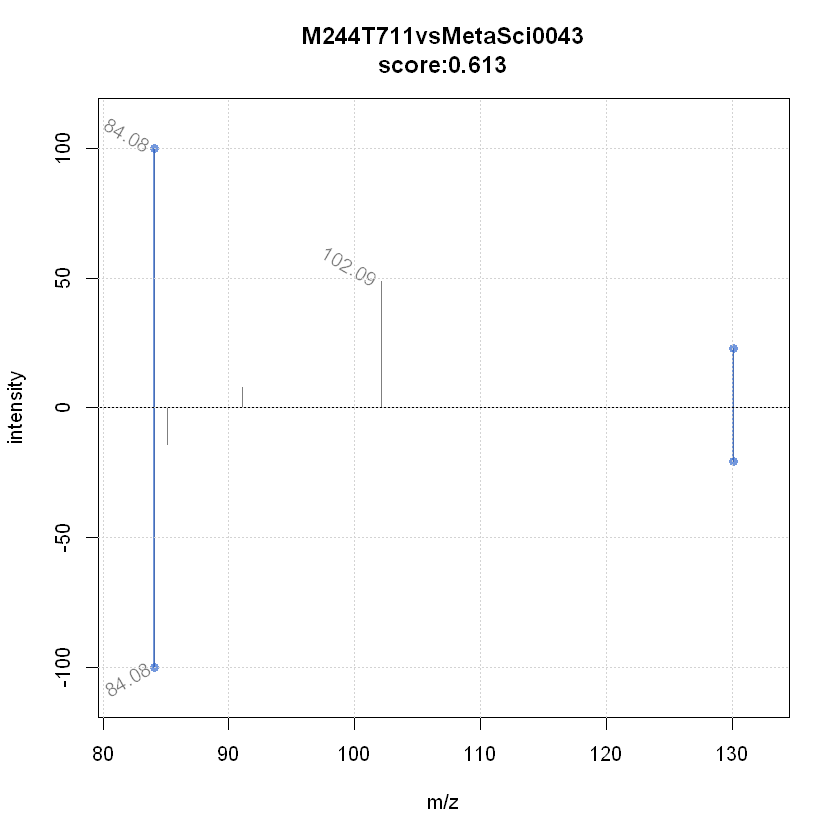

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.



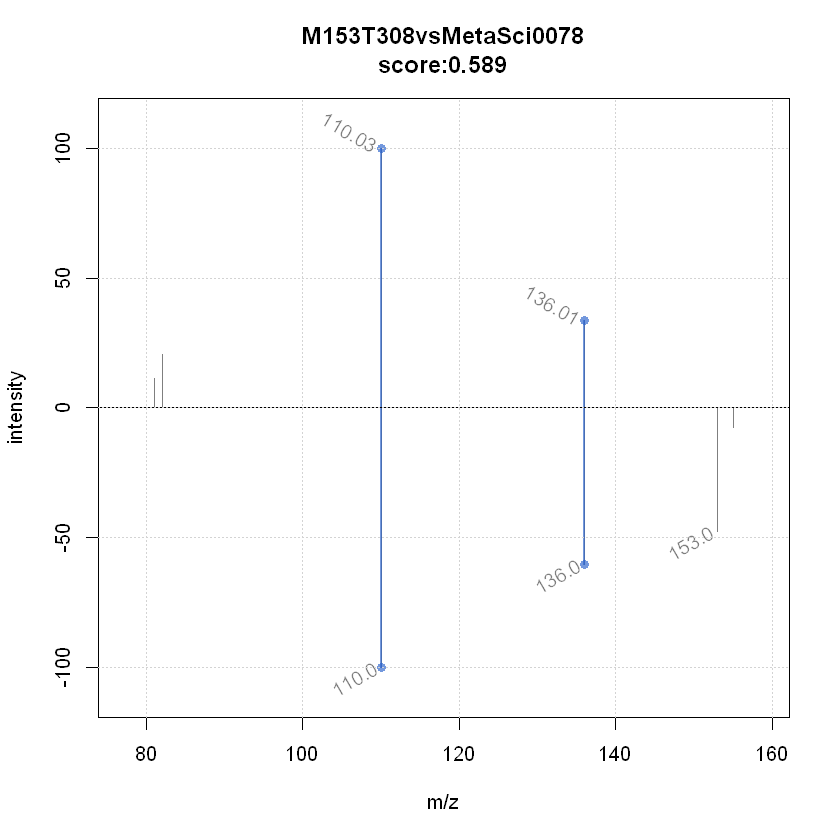

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.



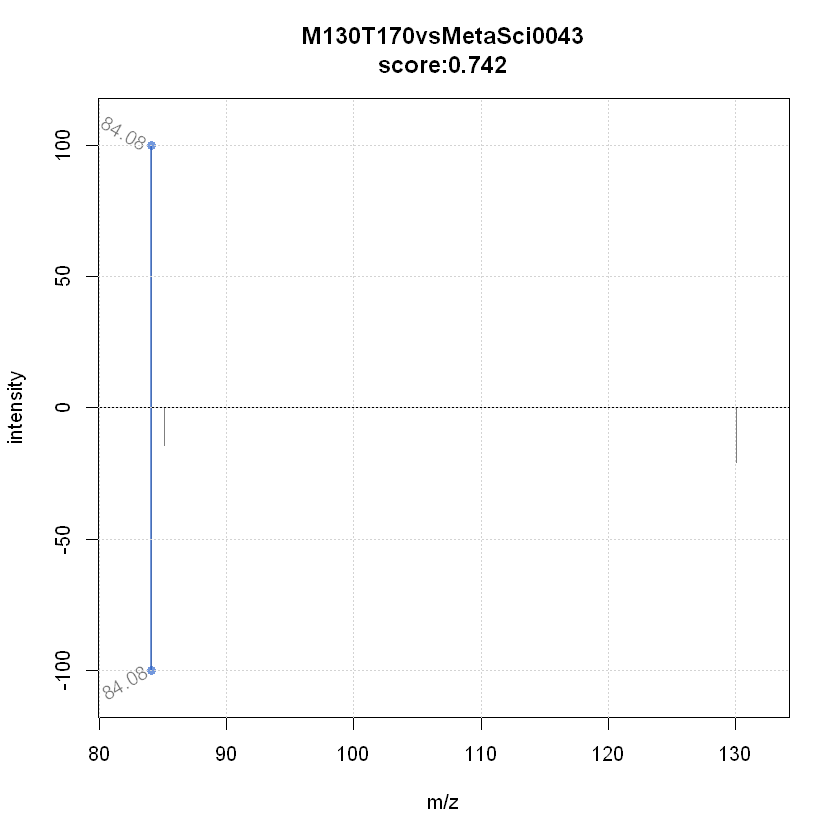

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.



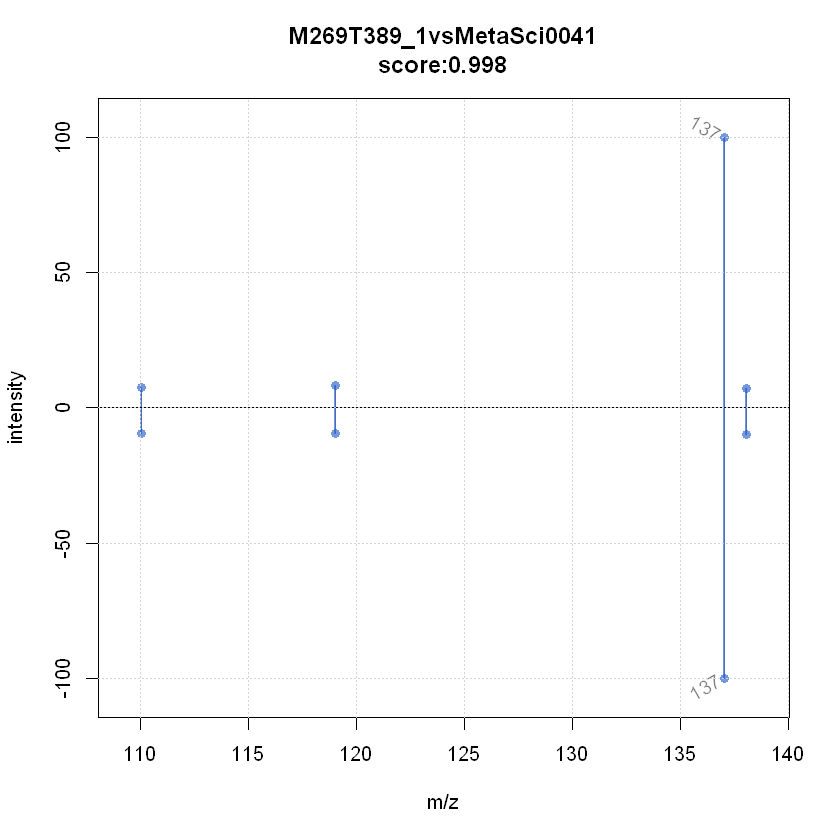

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.



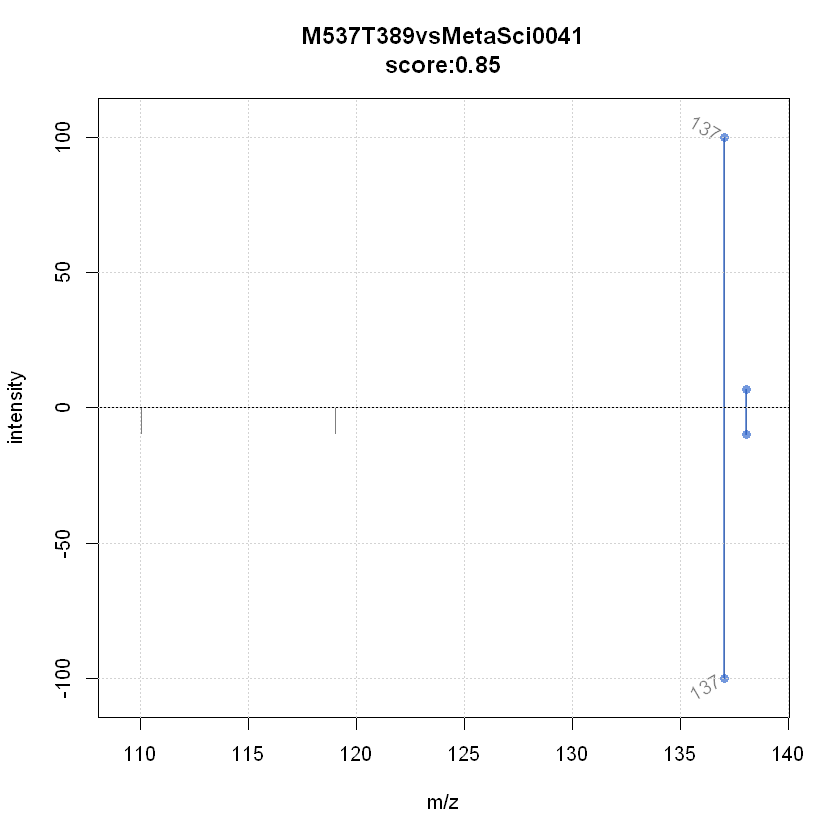

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.

'MsBackendCompDb' does not support parallel processing. Switching to serial processing.



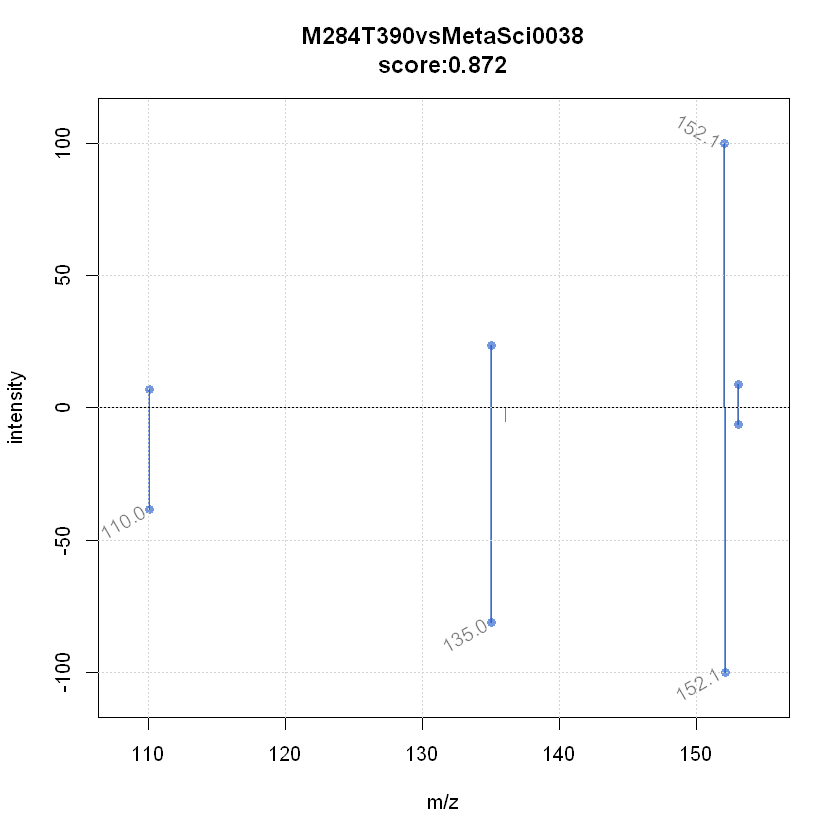

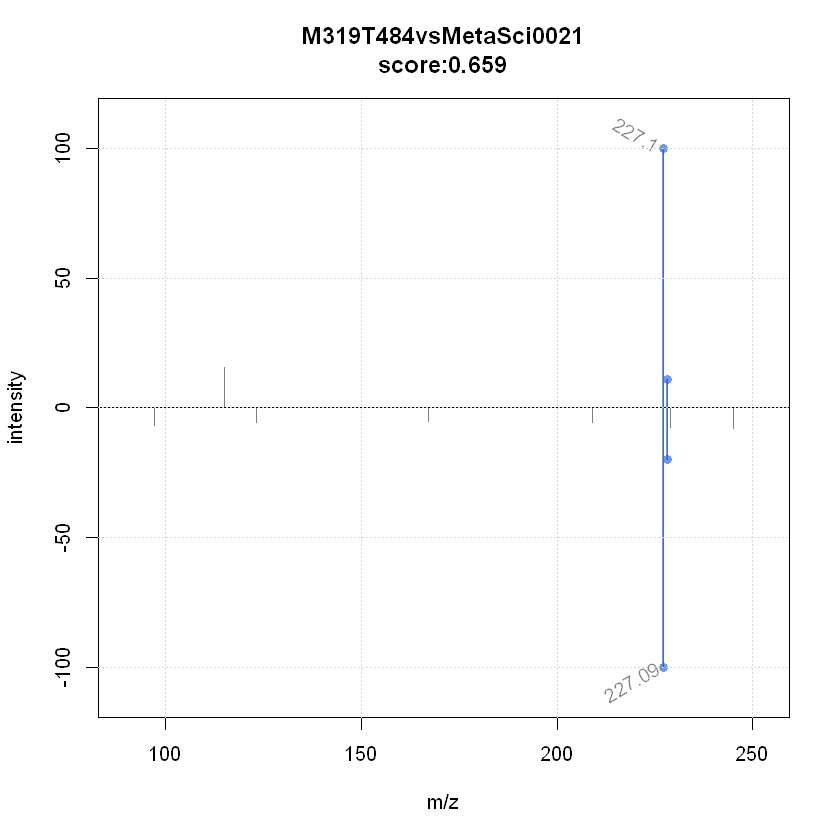

In [37]:
plot_match_feature(all_result_mylib,myLib,threshold_score = 0.5)

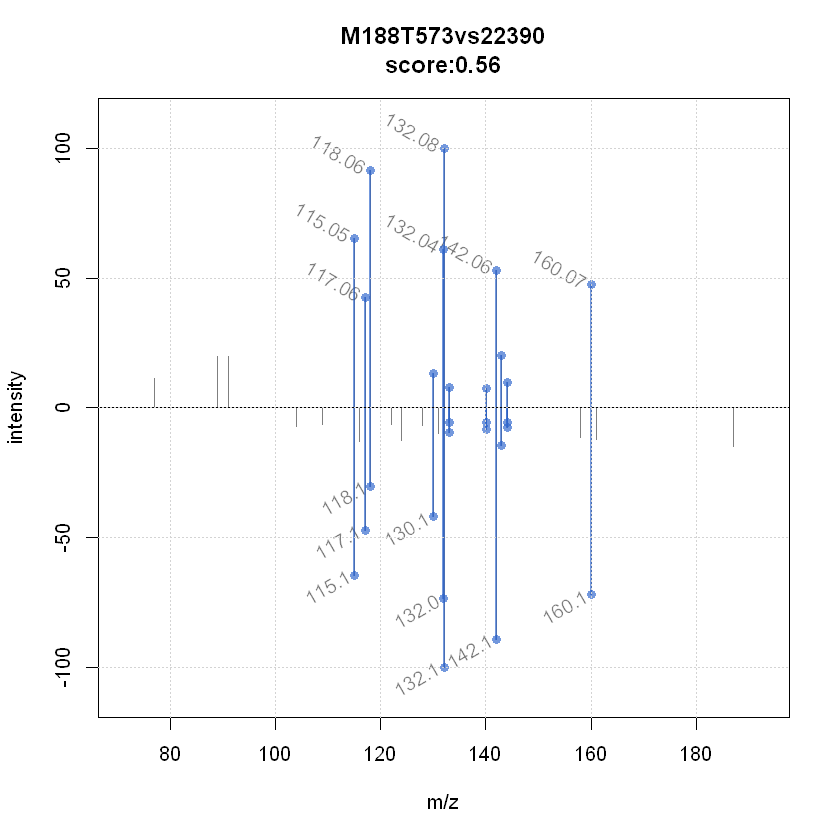

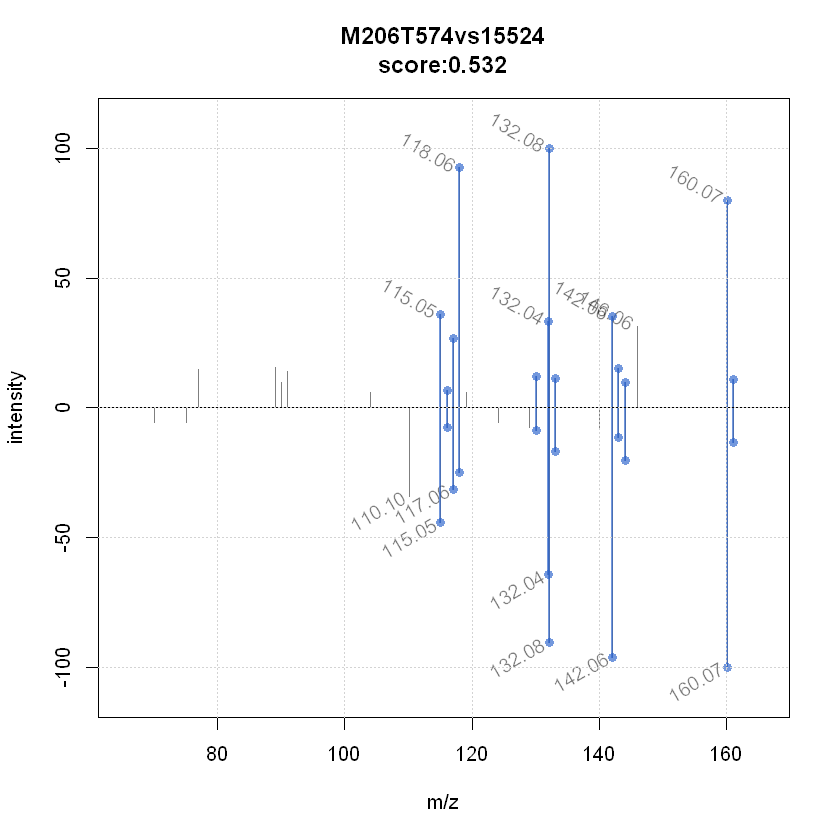

In [275]:
plot_match_feature(all_result_mbank_mergeSps)

In [38]:
spectraVariables(myLib)

[1] "msLevel"                 "rtime"                  
 [3] "acquisitionNum"          "scanIndex"              
 [5] "dataStorage"             "dataOrigin"             
 [7] "centroided"              "smoothed"               
 [9] "polarity"                "precScanNum"            
[11] "precursorMz"             "precursorIntensity"     
[13] "precursorCharge"         "collisionEnergy"        
[15] "isolationWindowLowerMz"  "isolationWindowTargetMz"
[17] "isolationWindowUpperMz"  "compound_id"            
[19] "HMDB_ID"                 "name"                   
[21] "cas"                     "exactmass"              
[23] "formula"                 "inchikey"               
[25] "inchi"                   "KEGG_ID"                
[27] "TITLE"                   "spectrum_id"            
[29] "predicted"               "splash"                 
[31] "instrument_type"         "instrument"             
[33] "msms_mz_range_min"       "msms_mz_range_max"      
[35] "synonym"